In [1]:
# Importando todas as bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lendo todos os DataSets com pandas
df_obesidade = pd.read_csv('./datasets/obesidade/obesity-cleaned.csv', sep=',', index_col=0)
df_pib_per_capita = pd.read_csv('./datasets/pib_per_capita/GDP.csv', sep=',')

## Limpando DataFrame de obesidade

In [3]:
# Criando um copia do DataFrame para melhor desempenho
df_obesidade_copia = df_obesidade.copy()

# Tratando coluna ['Obesity (%)'], onde excluir dados vazios
df_obesidade_copia = df_obesidade_copia.loc[df_obesidade_copia['Obesity (%)'] != 'No data']
# Criando uma coluna ['Obesity'] com os dados de obesidade convertidos para float (%)
df_obesidade_copia['Obesity'] = df_obesidade_copia['Obesity (%)'].apply(lambda x: float(x.split(' ')[0]))
# Apagando coluna ['Obesity (%)'] que ja foi tratada
df_obesidade_copia = df_obesidade_copia.drop(columns=['Obesity (%)'])
# Renomeando Colunas para o português
df_obesidade_copia.rename(columns={'Country': 'Paises',
                                   'Year': 'Ano',
                                   'Sex': 'Sexo',
                                   'Obesity': 'Obesidade'}, inplace=True)
df_obesidade_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24066 entries, 0 to 24569
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paises     24066 non-null  object 
 1   Ano        24066 non-null  int64  
 2   Sexo       24066 non-null  object 
 3   Obesidade  24066 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 940.1+ KB


 ## Comparando a taxa de obesidade por sexo

In [4]:
# Filtrando a média de obesidade por sexo e arredondando
obesidade_media_por_sexo = df_obesidade_copia.groupby('Sexo')['Obesidade'].mean().round(2)
obesidade_media_por_sexo

Sexo
Both sexes    12.48
Female        15.53
Male           9.33
Name: Obesidade, dtype: float64

## Calculando a percentual médio de obesidade por sexo na américa do norte em 2010

In [5]:
# Filtrando países da América do norte
paises_desejados = ['Mexico', 'Canada', 'United States of America']

# Filtrando DataFrame para ano de 2010 e paises desejados
df_obesidade_filtrado_2010_NA = df_obesidade_copia.loc[(df_obesidade_copia['Ano'] == 2010) & (df_obesidade_copia['Paises'].isin(paises_desejados))]

# Aplicando a media por sexo na coluna ['Obesidade']
media_2010_NA = df_obesidade_filtrado_2010_NA.groupby(['Sexo'])['Obesidade'].mean().round(2)
media_2010_NA

Sexo
Both sexes    28.03
Female        29.77
Male          26.03
Name: Obesidade, dtype: float64

 ## Top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010 e em 2016

In [6]:
# Filtrando a pelo ano de 2010
df_obesidade_filtrado_2010 = df_obesidade_copia.loc[df_obesidade_copia['Ano'] == 2010]

# Filtrando top 3 com maior e menor em 2010
top_3_obesidade_maior_2010 = df_obesidade_filtrado_2010.sort_values('Obesidade', ascending=False).head(3)
top_3_obesidade_menor_2010 = df_obesidade_filtrado_2010.sort_values('Obesidade', ascending=False).tail(3)
top_3_obesidade_maior_2010

,Paises,Ano,Sexo,Obesidade
15101,Nauru,2010,Female,61.9
15099,Nauru,2010,Both sexes,58.9
5021,Cook Islands,2010,Female,56.7


## Top 3 com maior e menor taxa de aumento de índices de obesidade em todo período

In [7]:
# Filtrando top 3 com maior e menor em todo o periodo
top_3_obesidade_maior = df_obesidade_copia.sort_values('Obesidade', ascending=False).head(3)
top_3_obesidade_menor = df_obesidade_copia.sort_values('Obesidade', ascending=False).tail(3)
top_3_obesidade_maior

,Paises,Ano,Sexo,Obesidade
15119,Nauru,2016,Female,63.3
15116,Nauru,2015,Female,63.1
15113,Nauru,2014,Female,62.9


## Extração do máximo de informação possível sobre o Brasil. Usando gráfico para apresentar

In [8]:
# Filtrando DataFrame so para mostrar dados do Brasil
df_obesidade_brasil = df_obesidade_copia.loc[df_obesidade_copia['Paises'] == 'Brazil']
df_obesidade_brasil_homem = df_obesidade_brasil.loc[df_obesidade_brasil['Sexo'] == 'Male']
df_obesidade_brasil_mulher = df_obesidade_brasil.loc[df_obesidade_brasil['Sexo'] == 'Female']
df_obesidade_brasil_ambos = df_obesidade_brasil.loc[df_obesidade_brasil['Sexo'] == 'Both sexes']

In [9]:
media_Brasil = df_obesidade_brasil.groupby(['Sexo'])['Obesidade'].mean().round(2)
media_Brasil

Sexo
Both sexes    12.88
Female        15.85
Male           9.67
Name: Obesidade, dtype: float64

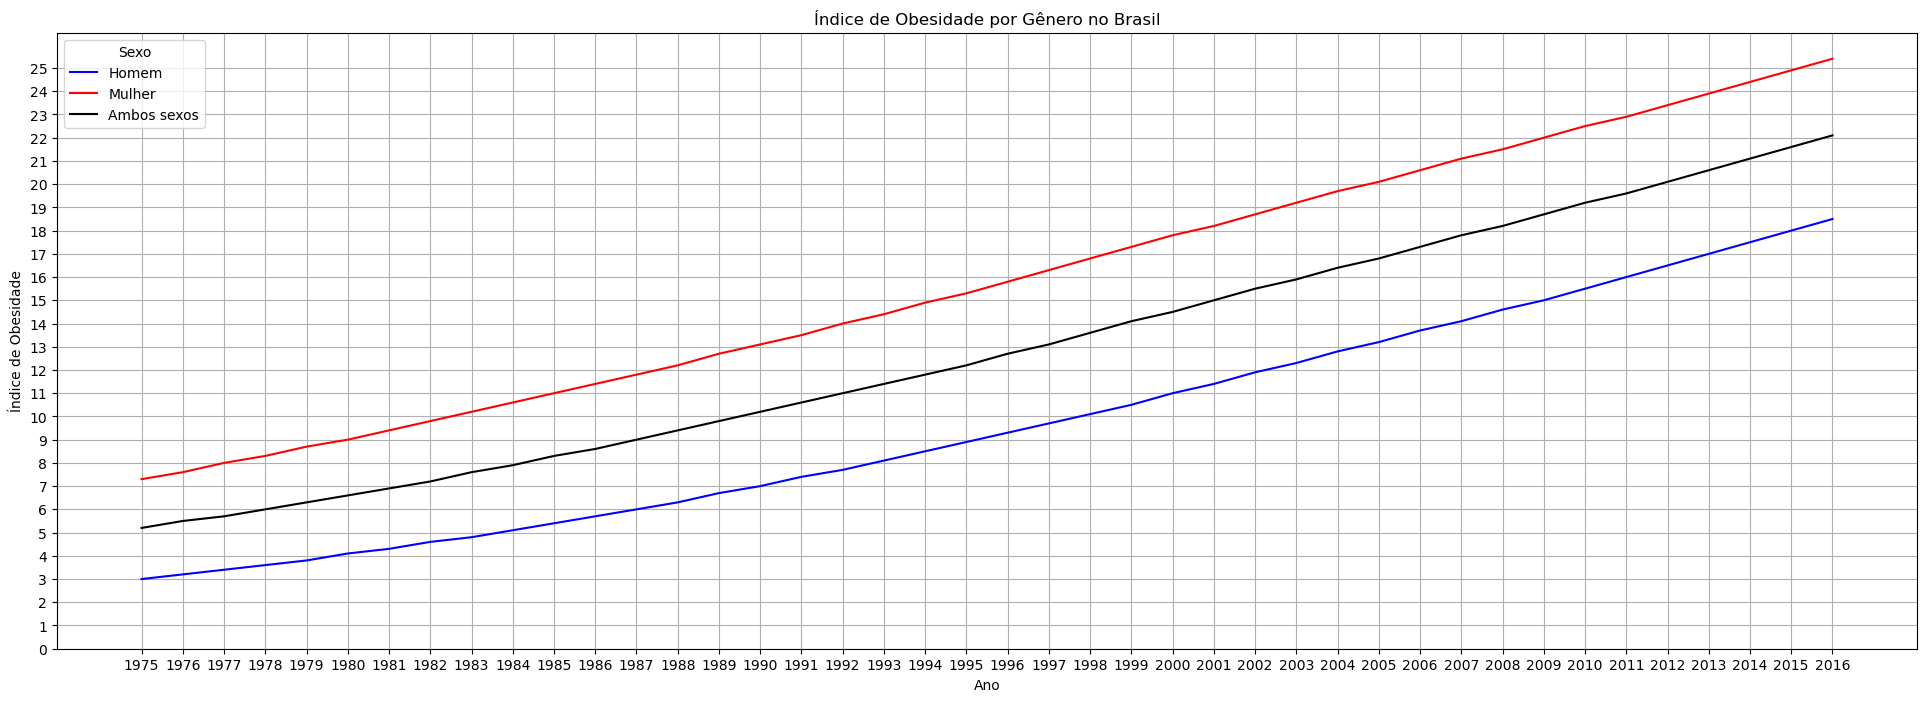

In [10]:

# Definindo cores para cada gênero
cores = {'Male': 'blue', 'Female': 'red', 'Both sexes': 'black'}

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(24, 8))

# # Plotando a linha de obesidade para homens e mulheres
ax.plot(df_obesidade_brasil_homem['Ano'], df_obesidade_brasil_homem['Obesidade'], label='Homem', color=cores['Male'])
ax.plot(df_obesidade_brasil_mulher['Ano'], df_obesidade_brasil_mulher['Obesidade'], label='Mulher', color=cores['Female'])
ax.plot(df_obesidade_brasil_ambos['Ano'], df_obesidade_brasil_ambos['Obesidade'], label='Ambos sexos', color=cores['Both sexes'])


# # Adicionando título, rótulos dos eixos e legenda
ax.set_title('Índice de Obesidade por Gênero no Brasil')
ax.set_xlabel('Ano')
ax.set_ylabel('Índice de Obesidade')
plt.legend(title='Sexo')
ax.grid()

# Definindo os limites dos eixos X e Y
lim_x_max = df_obesidade_brasil['Ano'].max()
lim_x_min = df_obesidade_brasil['Ano'].min()

ax.set_xticks(range(lim_x_min, lim_x_max + 1))

x = int(df_obesidade_brasil['Obesidade'].min())
y = int(df_obesidade_brasil['Obesidade'].max())
ax.set_yticks(range(0, y + 1))



# # Mostrando o gráfico
plt.show()

## Limpando DataFrame do pib

In [28]:
# Criando uma copia do DataFrame
df_pib_per_capita_copia = df_pib_per_capita.copy()

df_pib_per_capita_copia.rename(columns={'Country': 'Paises',
                                   'Region': 'Regiao',
                                   'Year': 'Anos',
                                   ' GDP_pp ': 'Pib per capita'}, inplace=True)

# Transformando tabela anos em datatime
df_pib_per_capita_copia['Anos'] = pd.to_datetime(df_pib_per_capita_copia['Anos'], errors='coerce')
# Formatando para aparecer somente os anos
df_pib_per_capita_copia['Anos'] = df_pib_per_capita_copia['Anos'].dt.year.astype('int64')
# Substituindo valores de 0 para NaN na coluna do pib
df_pib_per_capita_copia['Pib per capita'] = df_pib_per_capita_copia['Pib per capita'].replace(0, pd.NA)
# Formatando Pib para float e tirando separador
df_pib_per_capita_copia['Pib'] = df_pib_per_capita_copia['Pib per capita'].str.strip().str.replace(',', '').astype(float)
# Removendo coluna antes da formatação
df_pib_per_capita_copia = df_pib_per_capita_copia.drop(columns=['Pib per capita'])
df_pib_per_capita_copia

,Paises,Regiao,Anos,Pib
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [29]:
def fill_years(group):
    # Criar um range completo de anos
    full_years = pd.DataFrame({'Anos': range(group['Anos'].min(), group['Anos'].max() + 1)})
    # Merge com o grupo original para garantir todos os anos
    group = full_years.merge(group, on='Anos', how='left')
    # Preencher os valores de 'Paises' e 'Regiao'
    group['Paises'] = group['Paises'].ffill()
    group['Regiao'] = group['Regiao'].ffill()
    return group

# Aplicar o preenchimento para cada grupo de país e região
df_pib_per_capita_copia = df_pib_per_capita_copia.groupby(['Paises', 'Regiao'], group_keys=False).apply(fill_years)


df_pib_per_capita_copia[df_pib_per_capita_copia['Paises'] == 'Afghanistan']

,Anos,Paises,Regiao,Pib
0,1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",613.99
1,1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN
2,1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN
3,1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN
4,1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN
...,...,...,...,...
106,2007,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN
107,2008,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN
108,2009,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN
109,2010,Afghanistan,"Middle East, North Africa, and Greater Arabia",NaN


In [13]:
# Interpolando os valores ausentes
df_pib_per_capita_copia['Pib_Interpolado'] = round(df_pib_per_capita_copia['Pib'].interpolate(), 2)

# Removendo coluna que não está interpolada
df_pib_per_capita_copia = df_pib_per_capita_copia.drop(columns=['Pib'])

df_pib_per_capita_copia[df_pib_per_capita_copia['Paises'] == 'Afghanistan']

,Anos,Paises,Regiao,Pib_Interpolado
0,1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",613.99
1,1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",616.00
2,1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",618.01
3,1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",620.02
4,1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",622.03
...,...,...,...,...
106,2007,Afghanistan,"Middle East, North Africa, and Greater Arabia",962.60
107,2008,Afghanistan,"Middle East, North Africa, and Greater Arabia",1037.29
108,2009,Afghanistan,"Middle East, North Africa, and Greater Arabia",1111.97
109,2010,Afghanistan,"Middle East, North Africa, and Greater Arabia",1186.66


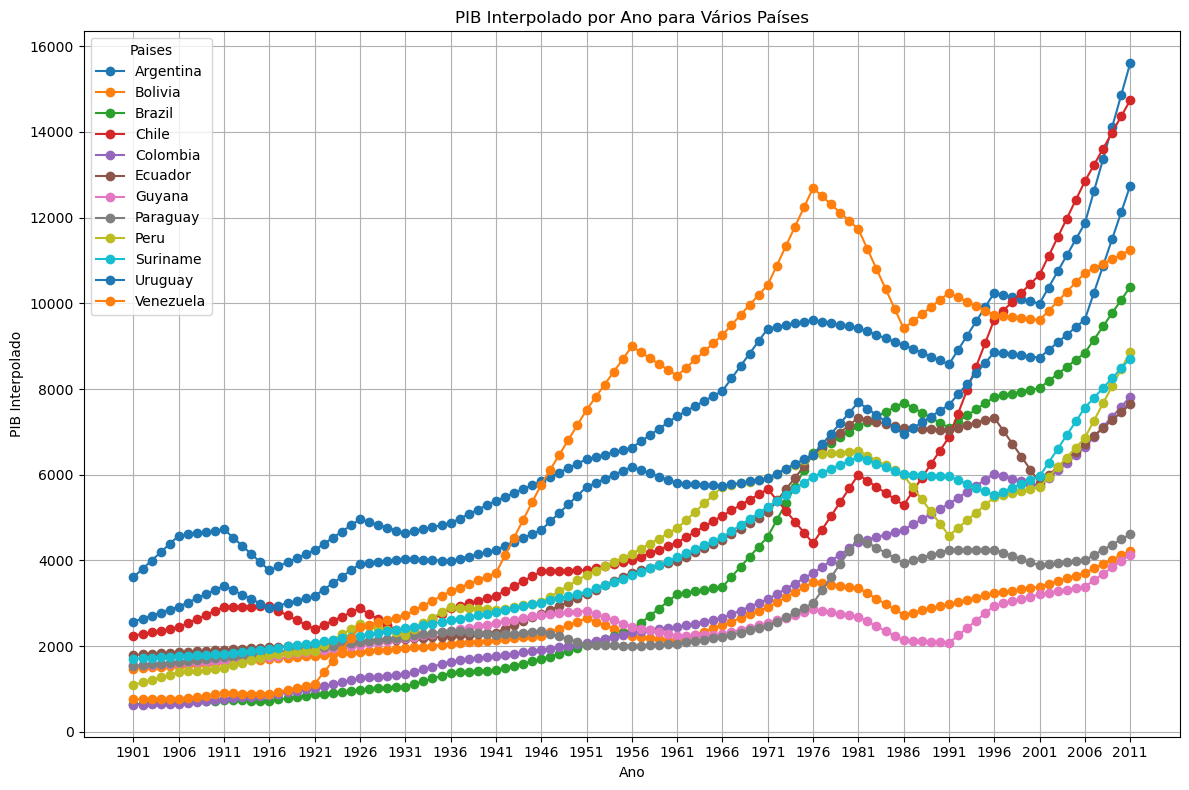

In [26]:
# Plotando o gráfico combinado para todos os países

paises_selecionados = df_pib_per_capita_copia[df_pib_per_capita_copia['Regiao'] == 'South America']
countries = paises_selecionados['Paises'].unique()
plt.figure(figsize=(12, 8))


for country in countries:
    country_data = df_pib_per_capita_copia[df_pib_per_capita_copia['Paises'] == country]
    plt.plot(country_data['Anos'], country_data['Pib_Interpolado'], marker='o', linestyle='-', label=country)

plt.title('PIB Interpolado por Ano para Vários Países')
plt.xlabel('Ano')
plt.ylabel('PIB Interpolado')
plt.grid(True)
plt.xticks(range(df_pib_per_capita_copia['Anos'].min(), df_pib_per_capita_copia['Anos'].max() + 1, 5))
plt.legend(title='Paises')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [16]:

# calcula a porcentagem de mudança
df_pib_per_capita_copia['Crescimento_PIB'] = df_pib_per_capita_copia.groupby('Regiao')['Pib_Interpolado'].pct_change() * 100
# calculando a média da coluna
crescimento_medio = df_pib_per_capita_copia.groupby('Regiao')['Crescimento_PIB'].mean()

# Agrupa da maior taxa de crescimento
regioes_maior_crescimento = crescimento_medio.sort_values(ascending=False)

display(round(regioes_maior_crescimento, 2))

Regiao
North America                                    1.63
Middle East, North Africa, and Greater Arabia    1.37
Europe                                           1.32
Asia                                             1.15
Central America and the Caribbean                0.99
South America                                    0.97
Australia and Oceania                            0.94
Sub-Saharan Africa                               0.64
Name: Crescimento_PIB, dtype: float64

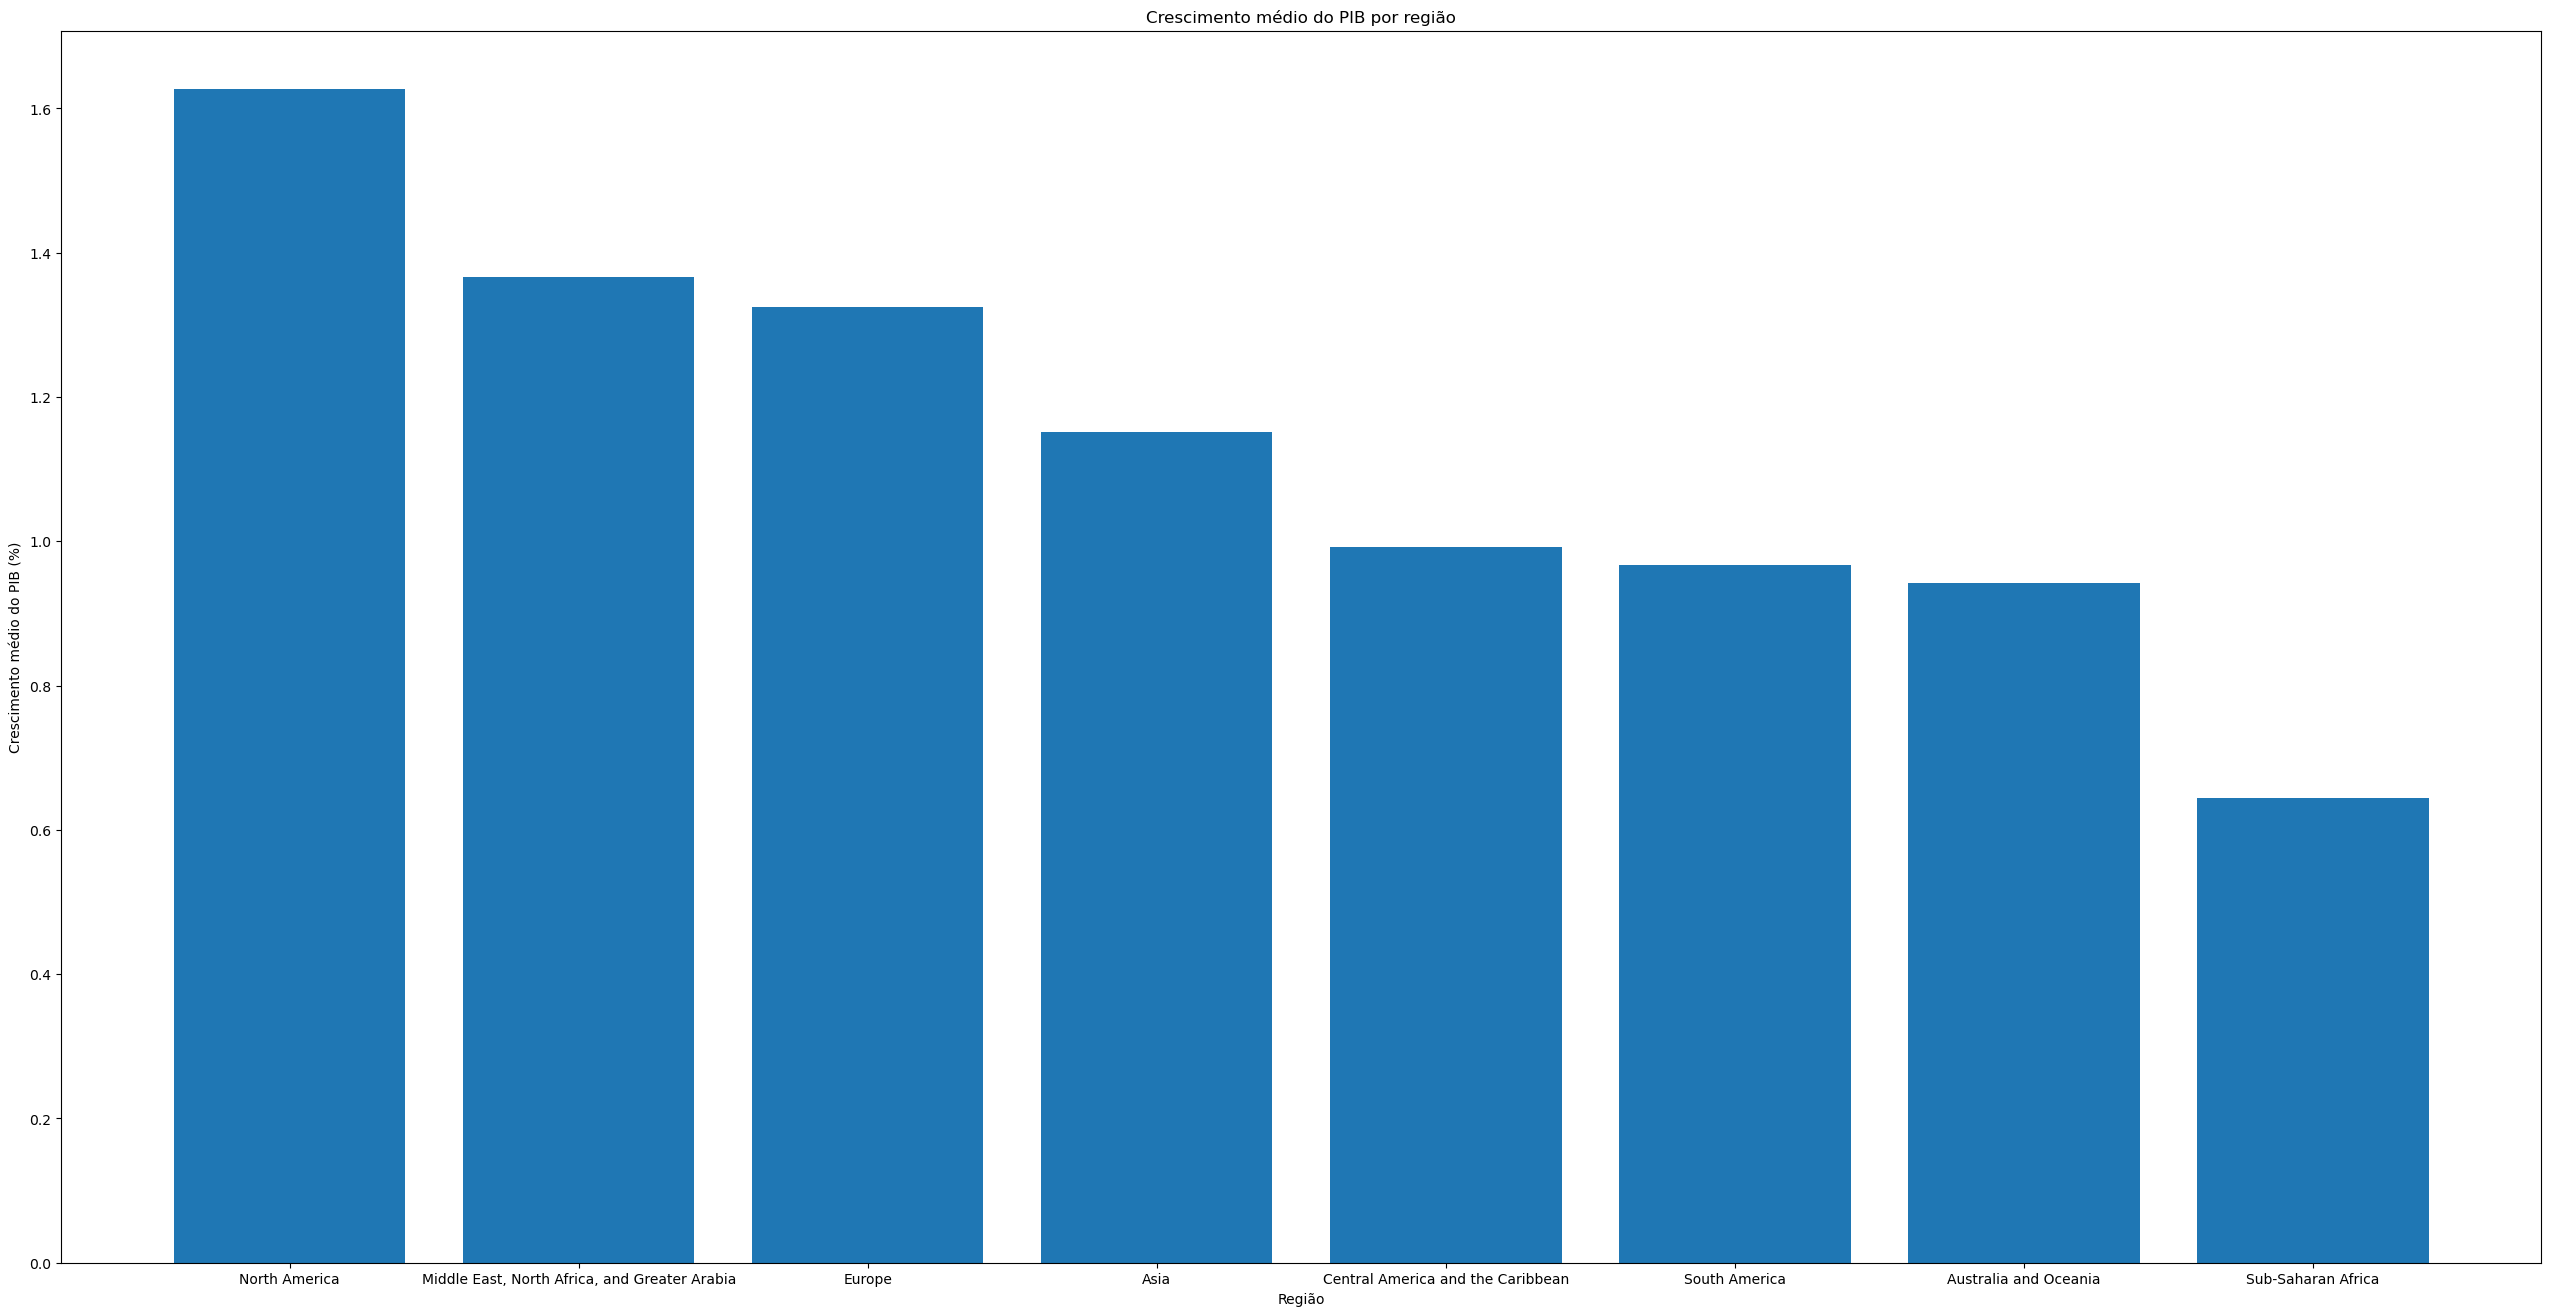

In [23]:
# Crie um gráfico de barras
plt.figure(figsize=(32, 16))
plt.bar(regioes_maior_crescimento.index, regioes_maior_crescimento.values)

# Adicione títulos e rótulos
plt.title('Crescimento médio do PIB por região')
plt.xlabel('Região')
plt.ylabel('Crescimento médio do PIB (%)')

# Mostra o gráfico
plt.show()